# 「**Deep Learning**の扉」　　
### ③**Python**を使ってニューラルネットワークの学習を学ぶ-基礎編-　　
___________________________________________________

## 1. 「Deep Learning」の世界を突き進もう！

前回は、ニューラルネットワークを始め、手書き数字認識（MNISTデータ）を学びました。

その時は、パラメータを乱数で決めただけだったので、認識の精度は良くありませんでした。

そこで今回は、ニューラルネットワークの学習を学び、訓練データから最適な重みパラメータを自動で獲得できるように基礎的なことを学んでいきます。

それでは頑張っていきましょう！

### Let's go!!

_________________

## 2. データから学習する

ニューラルネットワークの特徴は、データから学習できるという点にあります。

データから学習するというのは、重みパラメータの値をデータから自動で決定できるということです。

実際のニューラルネットワークでは、パラメータの数が数千、数万にも及ぶので手作業でパラメータを更新するのは、気が遠くなる作業になります。

そのため、自動で決定できるのはとても嬉しいですね！

最初は、文章が続きますがしっかり読んでイメージを掴んでください。

### 2-1. データの重要性とニューラルネットワークの利点

機械学習はデータが重要で、データがなければ何も始まりません。

そのため、機械学習の中心には「データ」が存在します。

皆さんが何らかの問題を解決しようとする場合、どうしますか？

おそらく、あれやこれやと経験や直感を手がかりに考え、そして答えを出すのではないでしょうか。

それに対し、機械の場合では、人の介入を極力避け、集められたデータから答えを見つけようとします。

さらに、ニューラルネットワークやディープラーニングは、人の介入を遠ざけることができるという重要な性質を持ちます。

具体的な問題を考えてみましょう。

例えば、「５」という数字を認識するプログラムを実装したいとします。

「５」という数字は、下の図に示すような手書きの画像だとして、５か５でないかを見分けるプログラムを実装することがゴールだとしましょう。

とすると、どんなアルゴリズムが考えられますか？



<img src="img3_1.png" style="width: 700px; float:left;">

図2-1

うーん。見れば当然５であるかどうかなんて簡単なのにな。機械に見分けさせるってどうやるんだ？

となるくらいこれは意外と難しい問題なのです。

今まで「５」という数字をたくさん見てきたはずなので、「５」を５だと判断するのは無意識の域だと思います。

つまり、どのように「５」だと判断したかを明確に説明するのは困難なのではないでしょうか。

そこで、ゼロから「５」を認識するアルゴリズムをひねり出すのではなく、データを有効に活用して解決したいと思います。

その１つの方法として、画像から特徴量を抽出して、その特徴量のパターンを機械学習の技術で学習する方法が考えられます。

この機械学習によるアプローチでは、集められたデータの中から「機械」が規則性を見つけ出します。

しかし、ひとつ注意点があります。

それは、問題に応じて適した特徴量を使わなければ、なかなか良い結果が得られないということです。

このことから、特徴量と機械学習によるアプローチでも、問題に応じて、「人」の手によって適した特徴量を考える必要があるかもしれないということがわかります。

しかし、ニューラルネットワークは、画像をそのまま学習します。

さらに、ニューラルネットワークは、画像に含まれる重要な特徴量までも「機械」が学習するのです。

先ほど問題に応じて適した特徴量を使わなければいけないと言いましたが、

ニューラルネットワークの場合、対象とする問題に関係なく、データをそのままの生データとして最初から最後まで学習することができるのです。

すごいですね！

だんだんニューラルネットワークのすごさがわかってきたのではないでしょうか。

### 2-2. 訓練データとテストデータ

前回、MNISTデータを扱う際に、訓練データとテストデータに分けたのを覚えていますか？

機械学習の問題では、このように訓練データとテストデータの２つに分けて学習を行うのが一般的なのです。

名前からわかると思いますが、訓練データで学習を行い、最適なパラメータを探します。

そして、テストデータを用いて、訓練したモデルの実力を評価します。

私たちが欲しいのは、汎用的なモデルになります。

この汎化能力を正しく評価するために、訓練データとテストデータに分けるのです。

しかし、モデルを訓練していると、一つのデータセットだけに対応したモデルができてしまうことがあります。

このように、あるデータセットだけに過度に対応した状態を過学習と言います。

汎用的なモデルを目指すということは、過学習を避けると言い換えることもできますね。

<img src="img3_2.png" style="width: 600px; float:left;">

図2-2

ふぅ。読むだけというのも疲れてしまいますね。

ストレッチなど休憩を挟んで、次の章に進んでください！

## 3. 損失関数

ニューラルネットワークの学習では、ある「１つの指標」によって現在の状態を表します。

そして、その指標を基準にして最適な重みパラメータの探索を行うのです。

では、ニューラルネットワークにおける指標とは何なのか。

それがこの章で学んでいく「損失関数」になります。

名前の通り、ニューラルネットワークの性能の悪さを示す指標になります。

<img src="img3_3.png" style="width: 800px; float:left;">

図3-1

### 3-1. 二乗和誤差

損失関数として用いられる関数はいくつかありますが、最も有名なものは二乗和誤差になります。

二乗和誤差ってどんなもの？ってなりますよね。

二乗和誤差の式を以下に示します。

$$
    E = \frac{1}{2}\sum_{k}(y_k - t_k)^2
$$

確かに二乗して足し合わせているけど、「y<sub>k</sub>」と「t<sub>k</sub>」って何だ？という質問にお答えしましょう。

「y<sub>k</sub>」はニューラルネットワークの出力を、「t<sub>k</sub>」は訓練データのラベルを表します。

前回の手書き数字認識の場合では、「y<sub>k</sub>」は出力であり、入力画像に対してどの画像であるかという予想を表しています。

「t<sub>k</sub>」は画像ラベルであり、入力画像が何の数字であったかを表しています。

また、「y<sub>k</sub>」や「t<sub>k</sub>」は、N個あるうちの１つの値を表しています。

例えば、手書き数字認識の場合では、１０個の値が存在し、そのうちの１つになります。

##### [y<sub>1</sub>, y<sub>2</sub>, y<sub>3</sub>,...,y<sub>10</sub>]

##### [t<sub>1</sub>, t<sub>2</sub>, t<sub>3</sub>,...,t<sub>10</sub>]

それでは、実際の数値で見ていきましょう。

In [3]:
y = [0.1, 0.1, 0.2, 0.0, 0.6, 0.0, 0.0, 0.0, 0.0, 0.0]
t = 4

今回は正解ラベルを4として、それ以外は０で表す「one-hot表現」を使って、「t<sub>k</sub>」に訓練データを代入したいと思います。

「one-hot表現」を用いると「４」は以下のように表されます。

In [5]:
t = [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]

この配列の要素は、最初のインデックスから順に、数字の「０」、「１」、「２」・・・に対応します。

これを踏まえて見直すと、「４」に対応する部分が「１」になっており、それ以外が「０」になっていることがわかります。

それでは、二乗和誤差に話を戻します。

「y<sub>k</sub>」はニューラルネットワークの出力を、「t<sub>k</sub>」は訓練データを表しているということを頭に入れて、二乗和誤差の式を思い出してみてください。

二乗和誤差の式は、ニューラルネットワークの出力と正解となる訓練データの各要素の差の二乗を計算し、その和を表しています。

それではいきなりですが、この二乗和誤差を実装してみましょう！

##### 【問題3-1】二乗和誤差を実装してください。

In [ ]:
######以下にコードを書いてください######
def mean_squared_error(y, t):
    

######「Shift + Enter」を押してください######

In [ ]:
def mean_squared_error(y, t):
    return 0.5 * np.sum((y - t)**2)

書けましたか？

式の通りにコードを書くだけなので簡単だと思いますが、「・・・」を押して、自分が書いたコードと照らし合わせてみてください。

では、この関数を使って実際に計算してみましょう。

##### 【問題3-2】関数を使用し、以下の数値を用いて２パターン計算してください。また、Numpyモジュールをインポートしてください。

In [18]:
######以下の数値を使ってください######
t = [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
y1 = [0.1, 0.1, 0.2, 0.0, 0.6, 0.0, 0.0, 0.0, 0.0, 0.0]

In [ ]:
######以下にコードを書いてください######


######「Shift + Enter」を押してください######

In [19]:
######以下の数値を使ってください######
y2 = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]

In [ ]:
######以下にコードを書いてください######

######「Shift + Enter」を押してください######

計算できましたか？

与えられた数値をそのまま使おうとすると計算できません。

そこで以下のように「Numpy配列」にして計算します。

In [16]:
np.array(t)

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

では、計算結果を見ていきましょう。

In [22]:
print(mean_squared_error(np.array(y1), np.array(t)))
print(mean_squared_error(np.array(y2), np.array(t)))

0.11000000000000001
0.6475


うまく計算できた人は上記のように表示されると思います。

上の数値は、正解ラベルが「４」に対して「４」だと予想している場合であり、下の数値は、正解ラベルが「４」に対して「７」だと予想している場合になります。

上の数値の方が明らかに小さいことがわかりますね。

これは訓練データとの誤差が小さいということを意味しています。

つまり、出力「y1」の方が訓練データにより適合しているということを表しているのです。

<img src="img3_4.png" style="width: 500px; float:left;">

図3-2

### 3-2. 交差エントロピー誤差

先ほど二乗和誤差を学習しましたが、次は別の損失関数として、交差エントロピー誤差を学習していきます。

交差エントロピー誤差は次の数式で表されます。

$$
    E = -\sum_{k}t_k*logy_k
$$

「y<sub>k</sub>」と「t<sub>k</sub>」は、二乗和誤差でも説明したものと同じものになります。

ということは、「t<sub>k</sub>」は…？

はい！「one-hot表現」になります！

それを踏まえた上で式に注目してみてください。

「y<sub>k</sub>」の自然対数を取った数値と「t<sub>k</sub>」を掛け合わせ、その和を取っています。

「t<sub>k</sub>」は「one-hot表現」なので正解ラベルとなるインデックスだけが「１」で、その他は「０」にしています。

これは、正解ラベルが「１」に対応する出力の自然対数を計算するだけというように捉え直すことができます。

それ以外は「０」との積なので、「０」になることは当然ですね。

<img src="img3_5.png" style="width: 500px; float:left;">

図3-3

例えば、正解ラベルのインデックスが「２」であるとして、それに対応するニューラルネットワークの出力が「0.6」の場合、交差エントロピー誤差は、

$$
-log0.6 = 0.51
$$

と計算することができます。

また、「２」の出力が「0.1」の場合、

$$
-log0.1 = 2.30
$$

となります。

つまり、交差エントロピー誤差は、正解ラベルとなる出力の結果によって、その値が決まるのです。

自然対数のグラフを表示してみましょう。

/Users/imanishiwataru/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


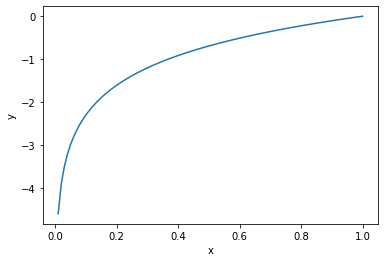

In [27]:
import matplotlib.pyplot as plt
x = np.arange(0, 1.01, 0.01)
y = np.log(x)
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

図3-4

このグラフで示されるように、xが1のときyは0になり、xが0に近づくにつれて、yの値はどんどん小さくなります。

つまり、正解ラベルに対応する出力が大きければ大きいほど０に近づきます。

では、交差エントロピー誤差を実装してみましょう。

##### 【問題3-3】交差エントロピー誤差を実装してください。

In [ ]:
######以下にコードを書いてください######
def cross_entropy_error(y, t):
    

######「Shift + Enter」を押してください######

今回も交差エントロピー誤差の式を参考にすれば、すぐに書けると思います。

しかし、「log(0)」の時を考えてみてください。

「log(0)」はマイナス無限大を表す「-inf」となってします。

こうなってしまうとそこで計算が**STOP**してしまうのです。

それでは困りますよね。

これを改善する必要があるので以下のように微小な値を追加して、マイナス無限大に発散するのを防ぎます。

In [28]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

それでは、簡単な計算をしてみましょう！

##### 【問題3-4】交差エントロピー誤差の関数を用いて２パターン計算してください。数値は二乗和誤差の時と同じものを使ってください。

In [ ]:
######以下にコードを書いてください#######


######「Shift + Enter」を押してください######

In [29]:
print(cross_entropy_error(np.array(y1), np.array(t)))
print(cross_entropy_error(np.array(y2), np.array(t)))

0.510825457099338
2.9957302735559908


上記の数値が表示されれば正解です。

「0.510825457099338」と表示されている方は、正解となるラベルの出力が「0.6」の場合で、「2.9957302735559908」と表示されている方は、正解となるラベルの出力が「0.05」と低い場合になります。

先ほど正解ラベルに対応する出力が大きければ大きいほど「０」に近づくと言いました。

結果を見てもらうとわかると思いますが、「0.6」と出力が大きい方が「０」に近い数値を表示していることがわかりますね。

### 3-3. ミニバッチ学習

機械学習の問題は、訓練データに対する損失関数を求め、その値をできるだけ小さくするようなパラメータを探し出すといった学習を行います。

ということは、訓練データがたくさんあったらそれ全部を指標にするの？ってなりますよね。

MNISTデータってたくさんデータ数なかったっけ…

そうなんです。MNISのデータセットの訓練データは50000個以上あるのです。

つまり、すべてのデータを対象にして損失関数を求めるには少し時間がかかってしまいます。

そこで、データの中から一部を選び出し、その一部のデータを全体の近似として利用するといった処理を行います。

それが「ミニバッチ学習」の大まかな説明になります。

ちなみに前回学んだ「バッチ処理」を覚えていますか？

複数のデータをまとめて処理するだのなんだの。

ミニバッチ学習もほぼ同じような処理を行います。

例えば、60000枚の訓練データの中から100枚を無作為に選び出して、その100枚を使って学習を行うのです。



<img src="img3_6.png" style="width: 500px; float:left;">

図3-5

それでは、ミニバッチ学習のために準備をしていきます。

MNISTデータセットの読み込み方は覚えていますか？

今から読み込んでいくので一緒に思い出しましょう！

In [4]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
######「Shift + Enter」を押してください######

まずはMNISTデータの準備に必要なモジュールをインポートします。

In [5]:
mnist = datasets.fetch_openml('mnist_784', version=1)
######「Shift + Enter」を押してください######

このコードで「MNISTデータ」を読み込むことができ、このデータには様々な情報が含まれているので、必要な画像データとラベルを取り出します。

それは以下のコードになります。

In [6]:
data = mnist.data
std_data = data / 255
label = mnist.target
label = [int(x) for x in label]
one_hot_label = np.identity(10)[label]
######「Shift + Enter」を押してください######

また、損失関数を求めるときには「one-hot表現」を用いるので、「label」を「one_hot_label」に変換します。

In [7]:
x_train, x_test, t_train, t_test = train_test_split(std_data, one_hot_label, test_size=0.2)
print(x_train.shape)
print(t_train.shape)
######「Shift + Enter」を押してください######

(56000, 784)
(56000, 10)


最後に得られたMNISTデータセットを訓練データとテストデータに分割し、訓練データの形状を確認します。

これで準備は完了です。

それでは、この訓練データの中からランダムに抜き出してみます。

「np.random.choice()」を使えば簡単に抜き出すことができます。

In [12]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]
######「Shift + Enter」を押してください######

このように「np.random.choice()」を使えば、指定された数字の中からランダムに好きな数だけ取り出すことができます。

<img src="img3_7.png" style="width: 500px; float:left;">

図3-6

例えば以下のようにすると、

In [ ]:
train_size = x_train.shape[0]
print(train_size)
np.random.choice(train_size, 10)
######「Shift + Enter」を押してください######

０から５６０００未満の数字の中から１０個取り出すことができます。

この取り出した数字をインデックスとして使うことで、５６０００個のデータの中からランダムにデータを取り出すことができるのです。

試しに見てみましょう。

In [17]:
batch_mask = np.random.choice(train_size, batch_size)
print(batch_mask[0])
t_batch[0] = t_train[batch_mask[0]]
print(t_batch[0])
######「Shift + Enter」を押してください######

9860
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


このように、０から５６０００未満の数字の中から１つ取り出し、その数字をインデックスとしたときに対応するラベルを表示していることがわかりますね。

それでは、実際に取り出してみましょう。

##### 【問題3-5】０から１０未満の数字の中からランダムに数字を３つ取り出し、その数字をインデックスとしたときに対応する数値を表示してください。

In [18]:
x = np.array([0, 2, 4, 1, 2, 6, 3, 5, 1, 8])

In [ ]:
######以下にコードを書いてください######


######「Shift + Enter」を押してください######

In [ ]:
index = np.random.choice(10, 3)
print(index)
x_sample = x[index]
print(x_sample)

それでは、このミニバッチを使って、損失関数を求めてみましょう！

### 3-4. ミニバッチを使った交差エントロピー誤差

交差エントロピー誤差はどのような式で表されたでしょうか。

この損失関数は、訓練データと出力データの自然対数をかけたものを足し合わせてマイナスとったものでしたね。

$$
    E = -\sum_{k}t_k*logy_k
$$

では交差エントロピー誤差をもう一度実装してみます。

In [24]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))
######「Shift + Enter」を押してください######

これは以前にやった内容なので何も難しいことはしていません。

しかし、問題点があります。

それは、この実装だとデータが１つの場合にしか対応していないということです。

困りますね…

そこで、データがバッチとしてまとめられて入力される場合にも対応するように書き換えていきます。

In [33]:
def cross_entropy_error(y, t):
    if y.ndim == 1 :
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size
######「Shift + Enter」を押してください######

「y」はニューラルネットワークの出力、「t」は訓練データとして考えてください。

まず、出力の次元が一次元かどうかを判断します。

「一次元かどうか」よりも「入力画像が一枚かどうか」と言った方がわかりやすいですね。

入力画像が一枚の場合、「reshape」を用いて整形します。

わざわざ形状を整形する必要ってあるの？

って思いますよね。

In [20]:
batch_size = y.shape[0]
######「Shift + Enter」を押してください######

というところに注目してみてください。

これは、出力データの枚数を取得するコードになります。

では、整形せずに枚数を取得してみましょう。

一枚のデータなので、「１」と表示されるでしょう。

In [23]:
y = np.array([0, 0, 0 ,2, 0])
y.shape[0]
######「Shift + Enter」を押してください######

5

あ、あれれ？

「５」という数字が出てきてしまいました。

なぜでしょうか。

これを見てください。

In [24]:
y.shape
######「Shift + Enter」を押してください######

(5,)

つまり、「y.shape[0]」は、タプルにおける１つ目の要素を表示するのです。

これでは要素数が返ってくるだけで、欲しい「一枚」という値は返ってこないのです。

そこで「reshape(1, y.size)」を使うことで「(1, y.size)」となり、一枚という値を得ることができるようになるのです。

１次元の場合について説明してきましたが、２次元以上の場合、どうなるのでしょうか。

言い換えると、画像が２枚以上の場合（３枚でも４枚でも構いません）、

In [ ]:
y.reshape(2, y.size)

をする必要はないのか。

結論から言うと、する必要はありません。

例えば、

In [2]:
y = np.array([[2.0, 1.0, 3.0], [1.0, 0.5, 3.0]])

といった２枚の画像がある場合、

In [3]:
y.shape

(2, 3)

となります。

つまり、「y.shape[0]」とすると、一次元の場合とは違って、以下のように画像の枚数が出力されます。

In [4]:
y.shape[0]

2

このように、画像が２枚以上の場合は、「reshape」をする必要がないのです。

最終的に、

In [ ]:
-np.sum(t * np.log(y + 1e-7)) / batch_size

のように、バッチの枚数で正規化し（/ batch_size）、一枚あたりの平均の交差エントロピー誤差を計算します。

これは、「one_hot_label」の場合なので、訓練データがラベルとして与えられた時は以下のように実装されます。

In [26]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size
######「Shift + Enter」を押してください######

「t」がいなくなってしまいました。

それは、正解ラベルに対する出力だけが必要だからです。

そのため、「y」の方で正解ラベルに対する出力を指定します。

「np.arange(batch_size)」は、「０」から「batch_size-1」までの配列を生成します。

つまり、「batch_size」が１００であれば、「０」から「９９」までの配列を生成します。

０番目の正解ラベルが「２」だとすると、「y[0, 2]」というようになります。

##### 【問題3-6】もう一度、ミニバッチに対応した交差エントロピー誤差を実装してください。

In [34]:
#######以下にコードを書いてください######
def cross_entropy_error(y, t):


y = np.array([0.0, 0.2, 0.4, 0.1, 0.0, 0.0, 0.2, 0.0, 0.0, 0.1])
t = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])
cross_entropy_error(y, t)
######「Shift + Enter」を押してください######

0.9162904818741863

「0.9162904818741863」と表示されれば正解です。

### 3-5. 損失関数の必要性

今まで損失関数について説明してきました。

しかし、適切なパラメータを得るための指標としか伝えていません。

なぜ損失関数を使うのか気になりますよね。

損失関数より認識精度の方がわかりやすい気がします。

<img src="img3_8.png" style="width: 700px; float:left;">

図3-7

しかし、「微分」という概念に注目すると損失関数の重要性が見えてくると思います。

例えば、あるニューラルネットワークにおける１つの重みパラメータに注目するとします。

ここで重みパラメータの損失関数に「微分」という概念を導入します。

重みパラメータの損失関数に対する微分とは何でしょうか。

それは、「その重みのパラメータの値を少し変化させたときに、損失関数がどのように変化するか」ということを表しています。

微分の値が「マイナス」であれば、その重みパラメータを正の方向へ変化させることで損失関数を減少させることができます。

ということは、「プラス」であればどうなるかは簡単ですね。

負の方向へ変化させれば、損失関数を減少させることができるのです。

じゃあ「プラス」でも「マイナス」でもない「０」の場合はどうなるのか。

それは、正の方向や負の方向に動かしても、損失関数の値が変化しないということを意味します。

つまり、その重みのパラメータの更新はそこでストップしてしまいます。

<img src="img3_9.png" style="width: 700px; float:left;">

図3-8

では、認識精度を指標にしてはいけない理由を説明します。

それは、微分がほとんどの場所で０になってしまうからです。

「０」になったらなぜダメなのか。

先ほど説明したように、微分値が「０」ということは、どちらの方向に動かしても、損失関数の値が変わらず、その重みのパラメータの更新がストップしてしまうということを意味します。

これでは、適切なパラメータを得ることができず、いつまで経っても良い結果を得ることはできません。

ん？ちょっと待てよ。（キムタク風）

どうして認識精度であればほとんどの場所で微分が０になってしまうんだ。そんなのわからないじゃないか。

と思う方もいると思いますので、例を出して考えてみたいと思います。

ここでは、１００枚の画像のうち３２枚だけ正しく認識できたとします。

すると、認識精度は３２％になることはすぐにわかりますね。

そこで認識精度を上げるために重みのパラメータを少し変化させますね。

しかし、少しの調整だけでは、認識精度はあまり変化しません。

また、変化したとしても３３％や３４％ととびとびの値になってしまいます。

なぜなら、認識精度は全体のなかで何枚の画像が正しく認識しているかを表しているだけで、パラメータを変化させることで、１００枚中32.567枚正しく認識できました。なんてことあり得ないですよね。

0.567枚ってなんだってなりますよね。

だから、認識精度を指標に使うことはできないのです。

それに対して、損失関数は「0.87354...」といった連続的な数値を取っていましたよね。

<img src="img3_10.png" style="width: 500px; float:left;">

図3-9

数学的に表すと以下のようになります。

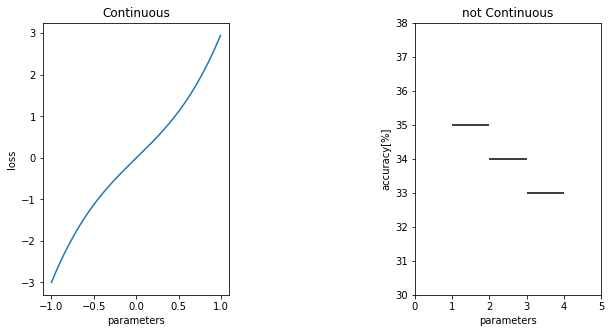

In [32]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.subplots_adjust(wspace=1)
x = np.arange(-1, 1, 0.01)
y = x**3 + 2*x

plt.subplot(1, 2, 1)
plt.plot(x, y)
plt.xlabel('parameters')
plt.ylabel('loss')
plt.title('Continuous')


plt.subplot(1, 2, 2)
plt.xlabel('parameters')
plt.ylabel('accuracy[%]')
xmin=3
xmax=4
plt.hlines(33, xmin, xmax)
x2min=2
x2max=3
plt.hlines(34, x2min, x2max)
x3min=1
x3max=2
plt.hlines(35, x3min, x3max)
plt.xlim(0, 5)
plt.ylim(30, 38)
plt.title('not Continuous')
plt.show()

左図は、パラメータを変化させると、損失関数が連続的に変化することを表しており、

右図は、パラメータを変化させると、認識精度が断続的に変化することを表しています。

何と無くイメージが湧いてきましたか？

これを聞くと損失関数がなんだか重要に感じてきちゃいますよね。

それにしても今回は文章が多いですね。

しかし、大切な内容となっていますので読み飛ばさずしっかり理解してから次に進んでくださいね！

それでは、微分について学習していきましょう！

## 4. 数値微分

先ほど微分を使うことで重みのパラメータを更新することができると言いました。

そんな微分も大事な内容なのでじっくり学んでいきましょう。

### 4-1. 微分

微分とは何か。

学校でやった気はするけど、

$$
  f(x) = x^2 \\
  \frac{d}{dx}f(x) = 2x
$$

こんな感じのやつ。

計算はできるけど、これが何を意味してるかはあんまり説明できない。

という方も多いのではないでしょうか。

普通に生活してて微分なんて意識しないですもんね。

簡単に説明すると、微分とは

#### 「ある瞬間」の変化の量

を表したものになります。

車を想像してもらうとわかりやすいかもしれません。

車が止まっている状態からアクセルを踏むと車は動き始めますよね。

微量であったとしてもこの車は速度を持っています。

つまり、アクセルを踏んだ瞬間に車の速度は０からある値に変化したと言えます。

このある瞬間の変化の量が微分に当たるのです。

<img src="img3_11.png" style="width: 500px; float:left;">

図4-1

では微分を数式で見ていきます。

$$
    \frac{df(x)}{dx} = \lim_{h\to 0}\frac{f(x+h)-f(x)}{h}
$$

左辺の$$\frac{df(x)}{dx}$$は、「f(x)」の「x」についての微分、

つまり、「x」に対する「f(x)」の変化の度合いを表しています。

それに対し、右辺は「x」を微小変化させると「f(x)」がどれだけ変化するかというのを表しています。

微小変化を表しているのが「h」になります。

この「h」を「lim<sub>h→0</sub>」によって限りなく０に近づけることで微小量としています。

<img src="img3_12.png" style="width: 450px; float:left;">

図4-2

それでは微分を実装していきましょう。

##### 【問題4-1】微分計算を実装してください。微小量は「h=10e-50」としてください。

In [ ]:
######以下にコードを書いてください######
def numerical_diff(f, x):

######「Shift + Enter」を押してください######

実装できましたでしょうか？

それでは以下の「・・・」を押して確認してみてください。

上記の数式を参考にして実装すると以下のようになると思います。

In [3]:
def numerical_diff(f, x):
    h = 10e-50
    return (f(x+h)-f(x)) / h

お！一緒だ！ってなった人
方には、

おめでとうございます！と言いたいのですが、実は改善すべきポイントがあるのです。

先ほど数式の説明のところで「h」を限りなく０に近づけると言いました。

そのため、実装の際には「h=10e-50」を使ってもらいました。

「10e-50」は「10<sup>-50</sup>」を表しており、「0.0000…0001」といった小さな値となります。

ここに一つ改善点があります。

こちらから「10e-50」を使うよう指定したのに、引っ掛けじゃないか！って思いますよね。

それに関してはごめんなさい。ということで話を戻します。

「10e-50」という小さな値を使ってしまうと、**「丸め誤差」**という問題が起きてしまいます。

「丸め誤差」とは、少数の小さな範囲において数値が省略されることで最終的な計算結果に誤差が生じることを言います。

<img src="img3_13.png" style="width: 600px; float:left;">

図4-3

実際に確認してみましょう。

In [21]:
np.float32(1e-50)
######「Shift + Enter」を押してください######

0.0

微小量だからといって、ただただ小さい数字を使えばいいということではないということがわかりますね。

ではどうすればいいのか。

「h=10<sup>-4</sup>」として計算すればいいのです。

この値を使えば、いい値が求められるということがわかっているので、こういうものだと思って使ってください。

これで何事もなく実装できる。と安心するのはまだ早いです！

まだもう一つ改善点が残っています。

微分の式を思い出してください。

$$
   \frac{df(x)}{dx} = \lim_{h\to 0}\frac{f(x+h)-f(x)}{h}
$$

この数式の

$$
    f(x+h) - f(x)
$$

は、関数fの差分を計算していますが、この計算には誤差が生じてしまいます。

それはなぜか。

本来、微分によって求められるのは、ある瞬間の変化量であり、

ある関数の「x」の位置での関数の傾き、つまり接線の傾きになります。


<img src="img3_14.png" style="width: 450px; float:left;">

図4-4

今度は上記の数式の右辺に注目してください。

これは、「x」と「x+h」の間の傾きを計算しています。

つまり以下のような直線になります（先ほどの図と重ねた直線を示します）。

<img src="img3_15.png" style="width: 450px; float:left;">

図4-5

このことからわかるように、今まで見てきた微分の式で得られる値と真の微分の値の間には差異が生まれてしまいます。

うーん困ったものですね。

どうしたらいいのでしょうか。

もちろん、改善策は用意してあります！

**「中心差分」**というものを導入します。

「中心差分」とは、(x+h)と(x-h)での関数fの差分を計算する手法になります。

以下の図を見てみてください。

<img src="img3_16.png" style="width: 450px; float:left;">

図4-6

少しわかりにくいですが、青色の直線とオレンジ色の直線が平行関係にあるように見えます。

平行であるということは、二つの直線の傾きが等しいということになります。

つまり、「中心差分」を使えば真の微分の値と近い数値を得ることができるのです。

##### 【問題4-2】中心差分を使って、微分を実装してください。
微小量は「h=0.0001」にしてください。

In [ ]:
######以下にコードを書いてください######


######「Shift + Enter」を押してください######

In [1]:
def numerical_diff(f, x):
    h = 10e-4
    return (f(x+h)-f(x-h)) / (2*h)

### 4-2. 数値微分の実際の計算

では、微分の式を使って実際に計算して見ましょう。

今回は以下の関数を微分します。

$$
    f(x) = 0.01x^2 + 0.1x
$$

この式をPythonで実装すると、

In [6]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

ではこの関数を描画して見ましょう。

【問題９】下記の関数を描画してください。
$$
   f(x) = 0.01x^2 + 0.1x
$$
範囲は、
$$
    0 ≦ x ≦ 20
$$
としてください。

In [4]:
######以下にコードを書いてください######
import matplotlib.pyplot as plt


######「Shift + Enter」を押してください######

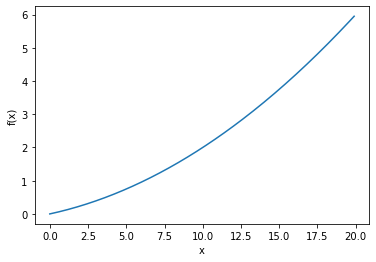

In [7]:
import numpy as np

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

図4-7

それでは、この関数の微分を、「x=5」と「x=10」の時でそれぞれ計算して見ましょう。

##### 【問題4-3】「x=5」と「x=10」の時の微分を計算してください。

In [ ]:
######「x=5の時」######
######以下にコードを書いてください######


######「Shift + Enter」を押してください######

In [ ]:
######「x=10の時」######
######以下にコードを書いてください######


######「Shift + Enter」を押してください######

「x=5」の時は、0.20に近い値、

「x=10」の時は、0.299に近い値が表示されると思います。

ここで計算した微分の値は、xに対するf(x)の変化の量であり、これは関数の傾きに対応します。

なお、
$$
    f(x) = 0.01x^2 + 0.1x
$$
の解析的な解は、
$$
    \frac{df(x)}{dx} = 0.02x + 0.1
$$
になります。

この式に、「x=5」と「x=10」を代入すると「真の微分」は、
$$
    0.02×5 + 0.1 = 0.2\\
    0.02×10 + 0.1 = 0.3
$$
と計算することができます。

この結果と先ほどPythonで実装した結果を比べてみると、わずかに誤差はありますが、ほとんど一緒であるということがわかります。

ってことは、

In [6]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h)-f(x-h)) / (2*h)

これを使えば微分をある程度正確に計算することができますね！

それでは、偏微分に移っていきます。

### 4-3. 偏微分

皆さんは、「偏微分」をご存知ですか？

「偏微分」とは、

**多変数関数において特定の文字だけを変数とし、それ以外を定数として微分する**

というものになります。

文章だけだとややこしいですね。

では、以下のような式を見て見ましょう。

$$
    f(x, y) = x^3 + 2xy + y^2
$$

この式を偏微分してみましょう。

先ほどの定義を元に、「x」を変数、「y」を定数として微分してみるとどうなるでしょうか。

「x」で偏微分すると、

$$
    \frac{df(x, y)}{dx} = 3x^2 + 2y
$$

となります。

細かく分解すると、

$$
    \frac{d(x^3)}{dx} = 3x^2\\
    \frac{d(2xy)}{dx} = 2y\\
    \frac{d(y^2)}{dx} = 0
$$

「x」を変数としているので、いつも通り微分し、「y」は定数なので「y」だけの場合は、０になりますね。

「y」を変数、「x」を定数としたらどうなるでしょうか。

考えて見てください。

答えは、

$$
    \frac{df(x, y)}{dy} = 2x + 2y
$$

となります。

それでは、Pythonで実装していきましょう。

今回は、
$$
    f(x_0, x_1) = x_0^2 + x_1^2
$$
を計算していきます。

この式は以下の２パターンで実装できます。

In [28]:
def function_2(x):
    return x[0]**2 + x[1]**2

def function_3(x):
    return np.sum(x**2)
######「Shift + Enter」######

これは、引数「x」にNumpy配列が入力されることを想定しています。

これはどんなグラフになるのでしょうか。

描画して、見てみましょう。

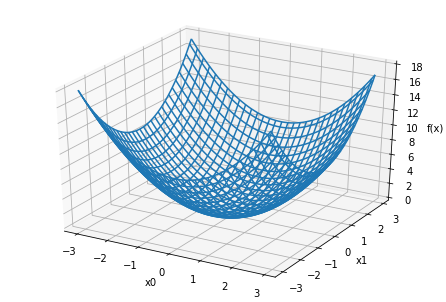

In [2]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

def function_2(x):
    return x[0]**2 + x[1]**2

x0 = np.arange(-3.0, 3.0, 0.1)
x1 = np.arange(-3.0, 3.0, 0.1)
x = np.meshgrid(x0, x1)
z = function_2(x)
fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.set_zlabel('f(x)')
ax.plot_wireframe(x[0], x[1], z)
plt.show()

図4-8

漁師さんが海で投げてそうな網のようなグラフが出てきました。

これが、
$$
    f(x_0, x_1) = x_0^2 + x_1^2
$$

のグラフになります。

描画の仕方が気になる方は、「・・・」を押してみてください。

特別、解説はしません。

それでは、この関数の微分を求めたいと思います。

①  　x<sub>0</sub> = 3,　x<sub>1</sub> = 4のとき、x<sub>0</sub>に対する偏微分
$$
    \frac{∂f}{∂x_0}
$$

を求めよ。

In [31]:
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0

numerical_diff(function_tmp1, 3)
######「Shift + Enter」を押してください######

5.999999999998451

まず、「x<sub>0</sub>」を変数、「x<sub>1</sub>」を定数とします。

そのため、
$$
    f(x_0, x_1) = x_0^2 + x_1^2
$$

という式を、
$$
    f(x_0, 4) = x_0^2 + 4^2
$$

といった「x<sub>1</sub>」に「4」を代入した式に変形します。

その後、この式を「x<sub>0</sub>」で微分します。

それでは、もう一つのパターンを計算してみてください。

②  　x<sub>0</sub> = 3,　x<sub>1</sub> = 4のとき、x<sub>1</sub>に対する偏微分
$$
    \frac{∂f}{∂x_1}
$$

を求めよ。

In [30]:
######以下にコードを書いてください######



######「Shift + Enter」を押してください######

8.000000000000895と表示されると思います。

このように、偏微分をPythonで実装するときには、ある特定の変数以外は定数として関数を置き換えてから、特定の変数で微分を行います。

【問題4-4】x = 2.0, y = 3.0, z = 4.0のとき、xに対する偏微分
$$
    \frac{∂f}{∂x}
$$

を求めよ。

以下の式を用いること。
$$
    f(x, y, z) = x^2 + 3xy + xz^2
$$

In [34]:
######以下にコードを書いてください######


######「Shift + Enter」を押してください######

In [36]:
def function_tmp3(x):
    return x**2 + 3*3*x + x*(4**2)
numerical_diff(function_tmp3, 2.0)

28.999999999996362

### 4-4. 勾配

偏微分を計算してきましたが、x<sub>0</sub>とx<sub>1</sub>を別々に計算してきました。

なんだか面倒ですよね。

まとめて偏微分できないの？と思う人も少なくないと思います。

そこで、まとめて偏微分できる方法を紹介したいと思います。

それは、「勾配」という方法です。

**勾配**とは、

(x<sub>0</sub>, x<sub>1</sub>)の両方の偏微分をまとめて、
$$
    (\frac{∂f}{∂x_0}, \frac{∂f}{∂x_1})
$$
のように、すべての変数の偏微分をベクトルとしてまとめたものを言います。

これを実装すると以下のように書くことができます。

In [25]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    for  idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
        
    return grad

え…一気に複雑に…

確かに今まで見てきた微分や偏微分の比べると、ややこしく見えますね。

しかし、一つ一つ確認するとそんなにややこしい内容ではありません。

では確認していきましょう。

まず、微小量「h」の設定です。

これは今まで通り「0.0001」が適切な値とされているのでこれを用います。

次に、「np.zeros_like(x)」ですが、これは「x」と同じ形状の配列を作る関数になります。

また、これによって作成された配列はすべて「０」で構成されています。

つまり、このコードを書くことで「grad」というすべての要素が「０」である配列を作ることができます。

<img src="img3_17.png" style="width: 600px; float:left;">

図4-9

例を見てみましょう。

In [4]:
import numpy as np
x = np.array([1, 2, 3])
grad = np.zeros_like(x)
grad
######「Shift + Enter」を押してください######

array([0, 0, 0])

このように「x」が１×３（１行３列）の配列であれば、すべての要素が「０」である１×３（１行３列）の配列が生成されます。

なぜ、このような配列を作るのか。

それは、最終的に得られた微分の値をこの配列に格納するためになります。

では、次のコードに移りましょう。

for文では、「x」の大きさ（x.size）だけ繰り返すように指定します。

また、「tmp_val」に「x[idx]」の値を代入することで、「x[idx]」の値を保存します。

これによって、「x+h」や「x-h」の値を簡単に計算することができます。

最終的に「x+h」と「x-h」の差分をとって「2h」で割りますが、これは今までやってきた微分計算と同じものになります。

「x[idx]」は「h」を足したり引いたりしているので、「tmp_val」を代入して元の値に戻してあげます。

以下に、どのような仕組みになっているのか書いてみたのでよければ、読んでみてください！

<img src="img3_18.png" style="width: 600px; float:left;">

図4-10

##### 【問題4-5】勾配を実装してください。

In [ ]:
######以下にコードを書いてください######



######「Shift + Enter」を押してください######

それでは、勾配を計算していきましょう。

In [33]:
numerical_gradient(function_2, np.array([3.0, 4.0]))
######「Shift + Enter」######

array([6., 8.])

今までは、片方を定数として固定することで計算していましたが、勾配という概念を導入することにより一気に計算が楽になりました。

それでは、皆さんも実際に計算してみましょう。

##### 【問題4-6】(0, 4)、(1, 2)のそれぞれにおいて勾配を計算してください。
$$
    f(x_0, x_1) = x_0^2 + x_1^2
$$

In [5]:
######以下にコードを書いてください######


######「Shift + Enter」を押してください######

計算できましたか？

計算できるのはわかったけど、これを求めて何になるんだ？

って思いますよね。

この勾配は何を表しているのでしょうか。

イメージしにくい時は、図に頼りましょう！

ということで
$$
    f(x_0, x_1) = x_0^2 + x_1^2
$$
の勾配を以下に表してみます。

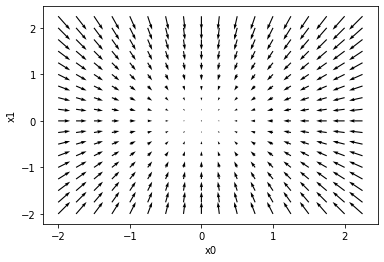

In [86]:
import matplotlib.pyplot as plt

x0 = np.arange(-2.0, 2.5, 0.25)
x1 = np.arange(-2.0, 2.5, 0.25)

x0_zero = np.zeros((18, 18))
x1_zero = np.zeros((18, 18))

for i in range(18):
    for j in range(18):
        d = (-1) * numerical_gradient(function_2, np.array([x0[i], x1[j]]))
        x0_zero[j][i], x1_zero[j][i] = (d[0], d[1])
        
plt.xlabel('x0')
plt.ylabel('x1')
plt.quiver(x0, x1, x0_zero, x1_zero)
plt.show()

図4-11

見えにくい方はぜひ拡大してみてください。

これは、勾配の結果に「−1倍」したものになります。（矢印を極小値の方向に向けるために「-1倍」しています。）

なんだか矢印がたくさんあるなぁ…。

そうなんです。

勾配はこのように向きを持った矢印（ベクトル）として図示されるのです。

計算した結果はなぜこんな矢印になるのか。

「勾配」という概念が出てきたときになんと説明したか覚えていますか？

(x<sub>0</sub>, x<sub>1</sub>)の両方の偏微分をまとめて、
$$
    (\frac{∂f}{∂x_0}, \frac{∂f}{∂x_1})
$$
のように、

#### すべての変数の偏微分をベクトルとしてまとめたもの

でしたね。

つまり、勾配はどの向きに進むのかを示すベクトルだったのです。

さらに、勾配を「-1倍」したものは各地点において低くなる方向を指すベクトルなのです。

視覚的に捉えた方がわかりやすいと思うので、以下の図をご覧ください。

<img src="img3_19.png" style="width: 600px; float:left;">

図4-12

このようにして、様々な点において勾配を計算し「-1倍」して図示したものが先ほど示したグラフなのです。

また、先ほどのグラフから勾配を「-1倍」したものは、
$$
    f(x_0, x_1) = x_0^2 + x_1^2
$$
の「一番低い場所（最小値）」を指していることがわかります。

今回、勾配を学ぶ上で一番重要なのは、

#### 「勾配を「-1倍」したものが示す方向は、各場所において関数の値を最も減らす方向」

ということです！

これは覚えておきましょう！

________________________

## 5. 問題集

##### 【演習5-1】以下の手順を踏んで、損失関数を計算してください。  

①損失関数として二乗和誤差を実装する。  
②出力層の活性化関数をソフトマックス関数として、これを実装する。（実装する際、オーバーフローを起こさないように工夫すること。）  
③出力層の前の層から伝わってきた数値をソフトマックス関数に入力し、出力層の出力値を計算する。  
④出力値と正解ラベルを使って、損失関数の値を計算する。

数値は以下の数値を使ってください。

In [9]:
a = [1.6, 3.2, 7.6] ###出力層の前の層から伝わってきた数値
t = [0, 0, 1]       ###正解ラベル

In [ ]:
######以下にコードを書いてください######




######「Shift + Enter」を押してください######

In [8]:
import numpy as np
def mean_squared_error(y, t):
    return 0.5*np.sum((y-t)**2)

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

a = np.array([1.6, 3.2, 7.6])
t = np.array([0, 0, 1])
y = softmax(a)
print(y)
mean_squared_error(y, t)

[0.00244271 0.01209881 0.98545848]


0.00018190184207785487

##### 【演習5-2】以下の手順を踏んで、損失関数を計算してください。  

①交差エントロピー誤差を実装する。  
②出力層の活性化関数をソフトマックス関数として、これを実装する。（実装する際、オーバーフローを起こさないように工夫すること。）    
③出力層の前の層から伝わってきた数値をソフトマックス関数に入力し、出力層の出力値を計算する。  
④出力値と正解ラベルを使って、損失関数の値を計算する。

数値は以下の数値を使ってください。

In [ ]:
x = [0.1, 0.2, 0.05, 2.4, 5.7]
t = [0, 0, 1, 0, 0]

In [ ]:
######以下にコードを書いてください######


######「Shift + Enter」を押してください######

In [11]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

a = np.array([0.1, 0.2, 0.05, 2.4, 5.7])
t = np.array([0, 0, 1, 0, 0])
y = softmax(a)
print(y)
cross_entropy_error(y, t)

[0.00352787 0.0038989  0.00335582 0.03518764 0.95402977]


5.697030603118715

##### 【演習5-3】以下の数式を実装し、(3, 4)における勾配を計算してください。
$$
    f(x_0, x_1) = 2x_0^3 + x_1^2 + 2x_0x_1
$$

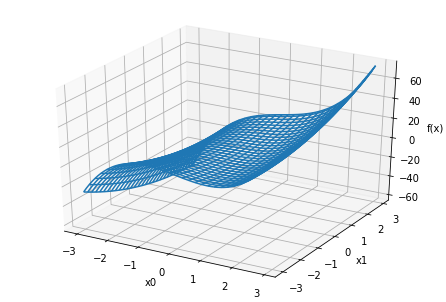

In [40]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

def function(x):
    return 2*x[0]**3 + x[1]**2 + 2*x[0]*x[1]

x0 = np.arange(-3.0, 3.0, 0.1)
x1 = np.arange(-3.0, 3.0, 0.1)
x = np.meshgrid(x0, x1)
z = function(x)
fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.set_zlabel('f(x)')
ax.plot_wireframe(x[0], x[1], z)
plt.show()

図5-1

In [ ]:
######以下にコードを書いてください######



######「Shift + Enter」を押してください######

##### 【演習5-4】以下の数式を実装し、(2, 1)における勾配を計算してください。
$$
    f(x_0, x_1) = x_0^2 + x_1^4 + 2x_0^2x_1
$$

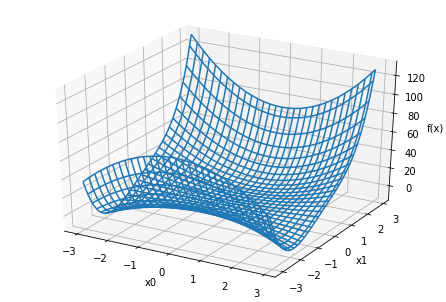

In [12]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

def function(x):
    return x[0]**2 + x[1]**4 + 2*(x[0]**2)*x[1]

x0 = np.arange(-3.0, 3.0, 0.1)
x1 = np.arange(-3.0, 3.0, 0.1)
x = np.meshgrid(x0, x1)
z = function(x)
fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.set_zlabel('f(x)')
ax.plot_wireframe(x[0], x[1], z)
plt.show()

図5-2

In [13]:
######以下にコードを書いてください######



######「Shift + Enter」を押してください######

_________

## 6. まとめ

お疲れ様でした！

ここで、**Python**を使ってニューラルネットワークの学習を学ぶ-基礎編-を終わりたいと思います。

基礎編が終了したということは、次は応用編になります！

応用編ということは、内容が少し複雑になるかもしれません。

しかし、今までの内容をしっかり理解していれば問題ないと思います！

ということで、疲れたであろう脳をしっかり休めてあげてください！

それではこの辺でさようなら！